## 📦 Importing Libraries
This cell imports the necessary libraries for data handling, visualization, and modeling.

In [ ]:
!wget https://zenodo.org/record/7711810/files/EuroSAT_RGB.zip?download=1 -O EuroSAT_RGB.zip
!unzip EuroSAT_RGB.zip -d data/


Streaming output truncated to the last 5000 lines.
  inflating: data/EuroSAT_RGB/Residential/Residential_489.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_1573.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_270.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_516.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_2683.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_502.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_2697.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_264.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_2867.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_2873.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_258.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_2126.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_1349.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_2640.jpg  
  inflating: data/EuroSAT_RGB/Residential/Res

## 🛰️ Loading the Data
This cell is responsible for loading the Sentinel-2 satellite image dataset.

Number of Category 10
Category: ['Residential', 'Pasture', 'Forest', 'Industrial', 'PermanentCrop', 'River', 'HerbaceousVegetation', 'AnnualCrop', 'Highway', 'SeaLake']


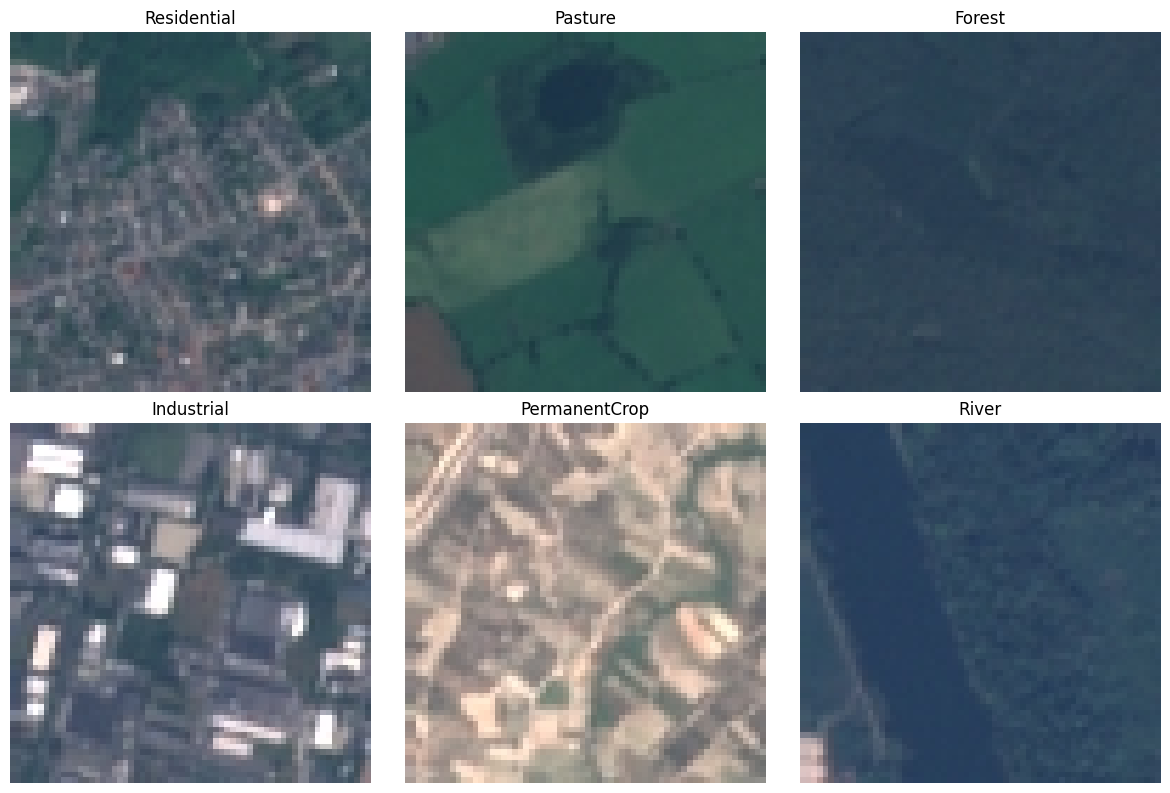

In [ ]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

data_dir = 'data/EuroSAT_RGB'

categories = os.listdir(data_dir)
print(f"Number of Category {len(categories)}")
print("Category:", categories)

plt.figure(figsize=(12, 8))
for i, category in enumerate(categories[:6]):
    category_path = os.path.join(data_dir, category)
    image_name = random.choice(os.listdir(category_path))
    image_path = os.path.join(category_path, image_name)
    image = Image.open(image_path)

    plt.subplot(2, 3, i + 1)
    plt.imshow(image)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()


## 🔍 Data Exploration
This cell explores the structure and basic statistics of the dataset.

In [ ]:
from sklearn.model_selection import train_test_split
import shutil
import os

original_dataset_dir = 'data/EuroSAT_RGB'
base_dir = 'data_split'
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Create folders for train and test
for category in os.listdir(original_dataset_dir):
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Split and copy images
for category in os.listdir(original_dataset_dir):
    category_path = os.path.join(original_dataset_dir, category)
    images = os.listdir(category_path)
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    for img in train_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(train_dir, category, img))

    for img in test_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(test_dir, category, img))

print("✅ Data successfully split into train and test.")


✅ Data successfully split into train and test.


## 🧹 Data Preprocessing
This cell handles preprocessing steps like resizing, normalization, or handling missing values.

In [ ]:
from tensorflow.keras import layers, models

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(categories), activation='softmax')  # Number of categories
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,490 (2.61 MB)

 Trainable params: 684,490 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

## 🧠 Model Building
Here, the deep learning model is defined using a neural network architecture.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data_split/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'data_split/test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


## 🏋️ Training the Model
This cell trains the model on the training dataset and evaluates it on validation data.

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // 32
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


675/675 ━━━━━━━━━━━━━━━━━━━━ 160s 235ms/step - accuracy: 0.4044 - loss: 1.5196 - val_accuracy: 0.7111 - val_loss: 0.8325
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 161s 238ms/step - accuracy: 0.7059 - loss: 0.8138 - val_accuracy: 0.7152 - val_loss: 0.7725
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 203s 300ms/step - accuracy: 0.7712 - loss: 0.6298 - val_accuracy: 0.7855 - val_loss: 0.6112
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 262s 301ms/step - accuracy: 0.8047 - loss: 0.5444 - val_accuracy: 0.7530 - val_loss: 0.6819
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 262s 300ms/step - accuracy: 0.8248 - loss: 0.4900 - val_accuracy: 0.8272 - val_loss: 0.4855
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 261s 299ms/step - accuracy: 0.8418 - loss: 0.4442 - val_accuracy: 0.8503 - val_loss: 0.4168
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 158s 235ms/step - accuracy: 0.8669 - loss: 0.3711 - val_accuracy: 0.8465 - val_loss: 0.4590
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 203s 236ms/step - accuracy: 0.8836 - loss: 0.32

## 📊 Evaluation and Visualization
This cell evaluates the performance and visualizes results like accuracy, loss, or predictions.

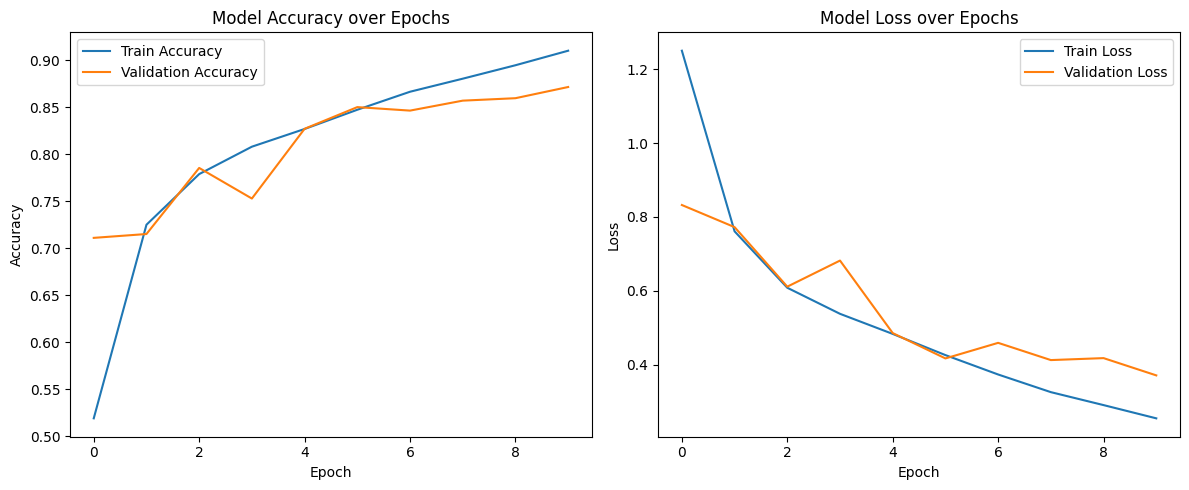

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## 💾 Saving the Model
This cell saves the trained model to disk for later use or deployment.

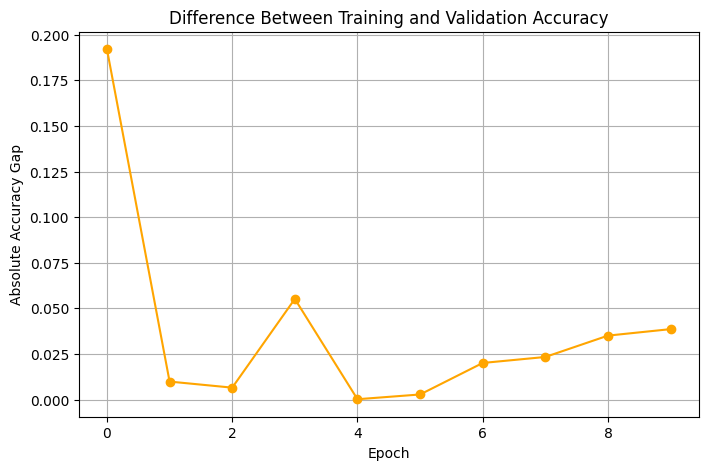

In [ ]:
import matplotlib.pyplot as plt

# حساب الفارق بين كل قيمة accuracy و val_accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
gap = [abs(a - v) for a, v in zip(accuracy, val_accuracy)]

# رسم الفارق
plt.figure(figsize=(8, 5))
plt.plot(gap, marker='o', color='orange')
plt.title('Difference Between Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Absolute Accuracy Gap')
plt.grid(True)
plt.show()


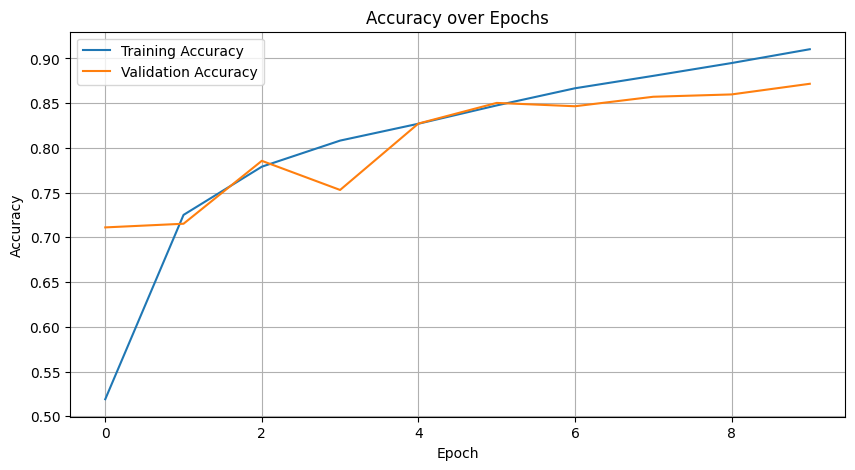

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


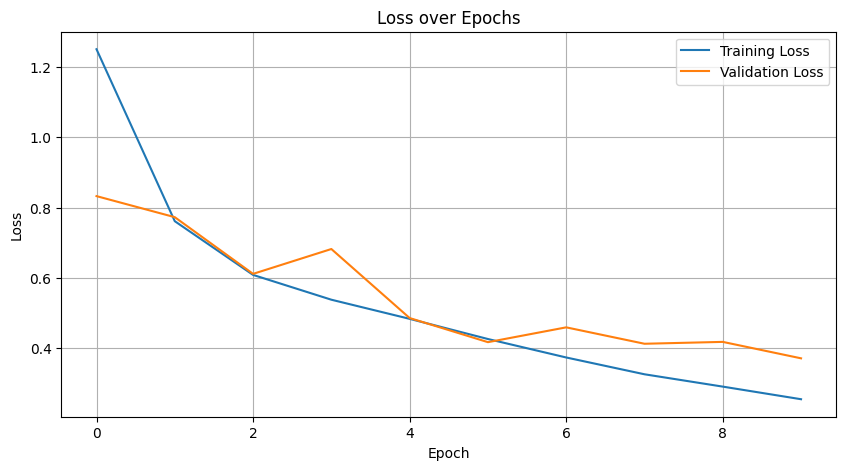

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


**Test Model**

In [ ]:
categories = train_generator.class_indices
print(categories)


{'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

Saving imj.jpg to imj.jpg


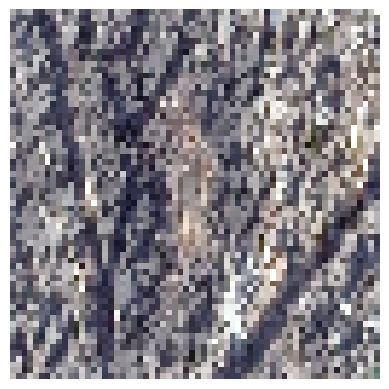

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
الصورة دي تنتمي إلى فئة: Residential


In [ ]:
from google.colab import files
uploaded = files.upload()

img_path = list(uploaded.keys())[0]

img = image.load_img(img_path, target_size=(64, 64))
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

categories = list(train_generator.class_indices.keys())
print("This image belongs to the category:", categories[predicted_class])
